# Números Fibonacci em Python

![img](https://raw.githubusercontent.com/the-akira/Python-Matematica/master/imagens/fibonacciblocks.png)

## Introdução

Em matemática, os números de Fibonacci, comumente denotados por $F_n$, formam uma sequência, chamada de sequência de Fibonacci, de modo que cada número é a soma dos dois precedentes, começando de **0** e **1**. 

Isso é:

$F_0 = 0$, $F_1 = 1$

e

$F_n = F_{n-1} + F_{n-2}$

para $n > 1$.

A sequência inicia:

$0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...$

Em algumas definições antigas, o valor $F_0 = 0$ é omitido, de forma que a sequência inicia com $F_1 = F_2 = 1$, e a recorrência:

\begin{equation}
\left\{
\begin{aligned}
    F_{n} & = F_{n-1} + F_{n-2} \\
    F_1 & = 1 \\
    F_2 & = 1 \\
\end{aligned}
\right.
\end{equation}

É válida para $n > 2$. Em sua definição original, Fibonacci iniciou a sequência com $F_1 = 1, F_2 = 1$.

## Derivação da Fórmula Geral

Como toda sequência definida por uma recorrência linear com coeficientes constantes, os números de Fibonacci têm uma expressão de forma fechada que tornou-se conhecida como fórmula de Binet, em homenagem ao matemático francês Jacques Philippe Marie Binet.

É possível derivar uma fórmula geral para $F_n$ sem computarmos todos os números anteriores da sequência.

Se uma série geométrica (uma série com uma razão constante entre seus termos consecutivos $r^n$) é para resolver a equação de diferença, nós devemos ter:

\begin{aligned}
    r^n = r^{n-1} + r^{n-2} \\
\end{aligned}

No qual é equivalente à:

\begin{aligned}
    r^2 = r + 1 \\
\end{aligned}

Esta equação tem duas soluções únicas:

\begin{aligned}
    \varphi = & \frac{1 + \sqrt{5}}{2} \approx 1.61803\cdots 
\end{aligned}

\begin{aligned}
    \psi = & \frac{1 - \sqrt{5}}{2} = 1 - \varphi = - {1 \over \varphi} \approx -0.61803\cdots
\end{aligned}

Particularmente, a raiz maior é conhecida como o **golden ratio**:

\begin{align}
\varphi = \frac{1 + \sqrt{5}}{2} \approx 1.61803\cdots
\end{align}

Agora, já que ambas as raízes resolvem a equação de diferença para os números Fibonacci, qualquer combinação linear das duas sequência também resolvem-no:

\begin{aligned}
    a \left(\frac{1 + \sqrt{5}}{2}\right)^n + b \left(\frac{1 - \sqrt{5}}{2}\right)^n \\
\end{aligned}

Não é difícil de observarmos que todos os números Fibonacci devem ser dessa forma geral, porque nós podemos unicamente resolver para $a$ e $b$ de forma que as condições iniciais de $F_1 = 1$ e $F_0 = 0$ são encontradas:

\begin{equation}
\left\{
\begin{aligned}
    F_0 = 0 = a \left(\frac{1 + \sqrt{5}}{2}\right)^0 + b \left(\frac{1 - \sqrt{5}}{2}\right)^0 \\
    F_1 = 1 = a \left(\frac{1 + \sqrt{5}}{2}\right)^1 + b \left(\frac{1 - \sqrt{5}}{2}\right)^1 \\
\end{aligned}
\right.
\end{equation}

Produzindo:

\begin{equation}
\left\{
\begin{aligned}
    a = \frac{1}{\sqrt{5}} \\
    b = \frac{-1}{\sqrt{5}} \\
\end{aligned}
\right.
\end{equation}

Nós então derivamos a fórmula geral para o $n$-ésimo número Fibonacci:

\begin{aligned}
    F_n = \frac{1}{\sqrt{5}} \left(\frac{1 + \sqrt{5}}{2}\right)^n - \frac{1}{\sqrt{5}} \left(\frac{1 - \sqrt{5}}{2}\right)^n \\
\end{aligned}

Uma vez que o segundo termo tem um valor absoluto menor do que 1, nós podemos ver as razões dos números Fibonacci convergirem para o **golden ratio**:

\begin{aligned}
    \lim_{n \rightarrow \infty} \frac{F_n}{F_{n-1}} = \frac{1 + \sqrt{5}}{2}
\end{aligned}

## Implementações em Python

Escrever uma função em Python que seja capaz de imprimir o número Fibonacci **n** parece muito simples. 

Entretanto, até mesmo nesse simples caso nós devemos estar cientes de algumas sutilezas computacionais de forma a evitarmos erros e melhorarmos a eficiência da computação.

### Erro Comum: Recursão Ineficiente

Apresentamos a seguir uma solução recursiva:

In [1]:
import math

def fibonacci_recursivo(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)

print([fibonacci_recursivo(i) for i in range(20)])   

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


Aparentemente a solução parece funcionar bem, entretanto a sobrecarga da recursão é na realidade muito significante quando $n$ é levemente maior. 

Aqui estamos computando $F_{34}$:

In [2]:
%timeit fibonacci_recursivo(34)

2.65 s ± 86.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


A sobrecarga incorrida pela criação de um grande número de stack frames é tremenda. Python por padrão não executa o que é conhecido como **tail recursion elimination** e sendo assim, essa é uma implementação muito ineficiente. 

Em contraste, se tivermos uma implementação iterativa, isso acelerará dramaticamente a solução:

In [3]:
def fibonacci_iterativo(n):
    a, b = 0, 1
    while n > 0:
        a, b = b, a + b
        n -= 1
    return a

In [4]:
%timeit fibonacci_iterativo(34)

3.1 µs ± 287 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Agora vejamos se conseguimos fazer ainda mais rápido ao eliminarmos os loops completamente e irmos diretamente para a fórmula geral que derivamos mais cedo:

In [5]:
def formula_fibonacci(n):
    golden_ratio = (1 + math.sqrt(5)) / 2
    val = (golden_ratio**n - (1 - golden_ratio)**n) / math.sqrt(5)
    return int(round(val))

In [6]:
%timeit formula_fibonacci(34)

1.14 µs ± 16.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Mais rápido ainda! E uma vez que não estamos mais utilizando looping, nós devemos esperar ver que o tempo computacional escalará melhor ao 𝑛 aumentar.

### Desenhando o Espiral de Fibonacci

Os números de Fibonacci na sequência de Fibonacci frequentemente aparecerão diante de nossos olhos, como pinhas, abacaxis, o arranjo das folhas, o número de pétalas de certas flores e assim por diante. Também por causa de várias "coincidências" na natureza, a espiral de Fibonacci formada pela sequência de Fibonacci também é chamado de "Curva de Deus".

Para que possamos desenhar o espiral, primeiro vamos definir uma função que irá nos retornar a sequência de Fibonacci até o número que escolhermos:

In [9]:
import numpy as np

def fibo_seq(n):
    if n == 0:
        fibo_list = np.array([0])
    elif n == 1:
        fibo_list = np.array([0,1])
    else:
        f_0, f_1 = 0, 1
        fibo_list = np.array([f_0,f_1])
        for i in np.arange(n-2):
            fibo_num = f_0 + f_1
            fibo_list = np.append(fibo_list,fibo_num)
            f_0, f_1 = f_1, fibo_num
    return fibo_list

A seguir podemos testar a função computando os 10 primeiros números da sequência:

In [11]:
print(fibo_seq(10))

[ 0  1  1  2  3  5  8 13 21 34]


Agora precisamos encontrar os pontos correspondentes a cada 1/4 de círculo no gráfico.

Da mesma forma, se você desenhar qualquer centro de um círculo, você precisa encontrar a regra primeiro.

Liste as primeiras coordenadas do centro do círculo da seguinte forma:

| n  | (x,y) | Fibonacci | Flag |
|---|---|---|---|
| 1  | (0,0)  |  0 | 1  |
| 2  | (1,0)  |  1 | 1  |
| 3  | (1,-1)  | 1  | -1  |
| 4  | (-1,-1)  | 2  | -1  |
| 5  | (-1,2)  | 3  | 1  |
| 6  | (4,2)  | 5  | 1  |
| 7  | (4,-6)  | 8  | -1  |
| 8  | (-9,-6)  | 13  | -1  |
| 9  | (-9,15)  | 21  |  1 |
| 10  | (25,15)  | 34  | 1  |

Como apresentamos na tabela acima:

1. As coordenadas do centro do círculo são as coordenadas (**x**, **y**), em cada duas elas mudam uma. 
2. Para a abscissa x do n-ésimo centro do círculo, cada vez que ela muda, a sequência de números de Fibonacci é adicionada ou removida do n-ésimo termo. A mesma regra se aplica à ordenada y.
3. Adicione ou subtraia o número ordinal do enésimo item, consulte a série de flags na tabela para a regra. 

A lei pode ser expressa da seguinte forma:

$(-1)^{1+\frac{mod(n,2)+n}{2}} (−1)1+2mod(n,2)+n$

Em resumo, a coordenada **x** e **y** podem ser expressas como:

$x(n)=x(n-1)+mod(n+1,2)\times{F(n)}\times{(-1)^{1+\frac{mod(n,2)+n}{2}}}$

$x(n)=x(n−1)+mod(n+1,2)×F(n)×(−1)1+2mod(n,2)+n$

$y(n)=y(n-1)+mod(n,2)\times{F(n)}\times{(-1)^{1+\frac{mod(n,2)+n}{2}}}$

$y(n)=y(n−1)+mod(n,2)×F(n)×(−1)1+2mod(n,2)+n$

Entre eles, a sequência de Fibonacci é representada por $F(n)$:

In [12]:
def find_o_xy(f_list):
    # Coordenadas iniciais do centro do círculo
    x_n, y_n = 0, 0
    o_x_array, o_y_array = np.array([x_n]), np.array([y_n])
    for n in np.arange(1,len(f_list)):
        # O primeiro item foi dado como o ponto inicial
        y_n = y_n + np.mod(n+1,2) * f_list[n] * (-1)**(1+(np.mod(n+1,2)+n+1)/2)
        x_n = x_n + np.mod(n,2) * f_list[n] * (-1)**(1+(np.mod(n+1,2)+n+1)/2)
        # Coordenadas (x,y) horitontal e vertical
        o_x_array = np.append(o_x_array, x_n)
        o_y_array = np.append(o_y_array, y_n)
    return o_x_array, o_y_array

Com esta função podemos então encontrar as coordenadas:

In [13]:
sequencia = fibo_seq(10)
x, y = find_o_xy(sequencia)
print(x,y)

[ 0.  1.  1. -1. -1.  4.  4. -9. -9. 25.] [ 0.  0. -1. -1.  2.  2. -6. -6. 15. 15.]


E agora podemos plotar o gráfico com os pontos:

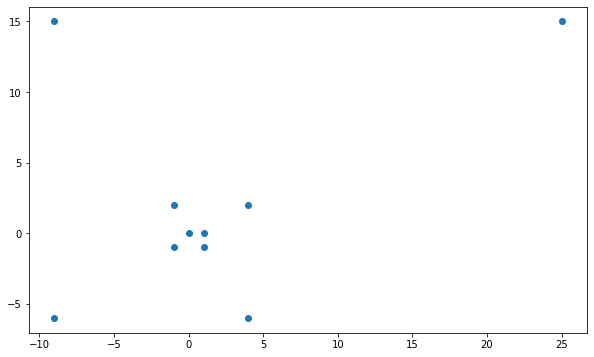

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o', linestyle="");

Para melhor compreensão, podemos conectá-los com linhas:

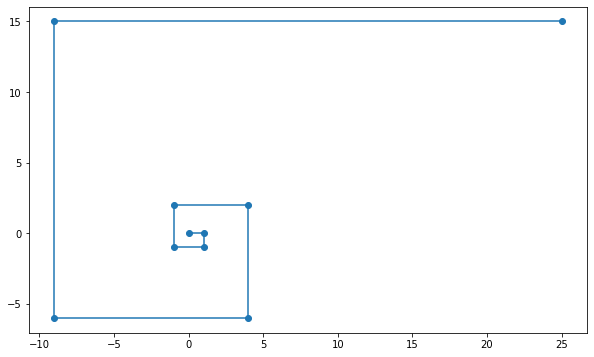

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o');

Sabendo a localização do centro do círculo, o raio do círculo muda de acordo com a sequência de números. 

Portanto, uma curva pode ser desenhada. Vamos tomar $n = 7$ como um exemplo:

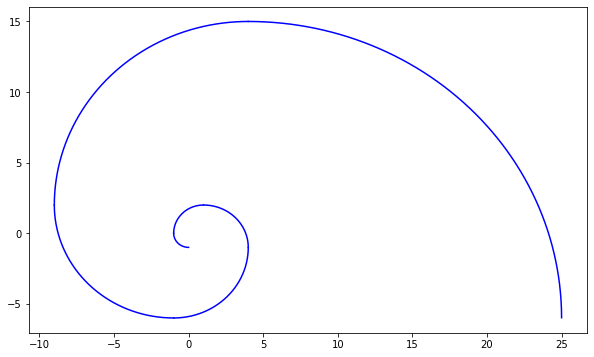

In [27]:
count = 7
f_list = fibo_seq(count)
x0_array, y0_array = find_o_xy(f_list)

# O comprimento lateral correspondente a cada quadrado, conforme mostrado no exemplo, o raio começa em 1, 2, ...
f_list_r = fibo_seq(count+2)[2::]

# Desenhar o círculo 1/4 em cada quadrado
plt.figure(figsize=(10,6))
start_angle, end_angle = np.pi, 1.5 * np.pi

for n in np.arange(len(f_list)):
    t = np.arange(start_angle,end_angle,0.001)
    circle_x = (f_list_r[n]) * (np.sin(t)) + x0_array[n]
    circle_y = (f_list_r[n]) * (np.cos(t)) + y0_array[n]
    start_angle += 0.5 * np.pi
    end_angle += 0.5 * np.pi
    plt.plot(circle_x,circle_y,color='b')

Para imitarmos o diagrama clássico da espiral de Fibonacci, desenhamos os quadrados:

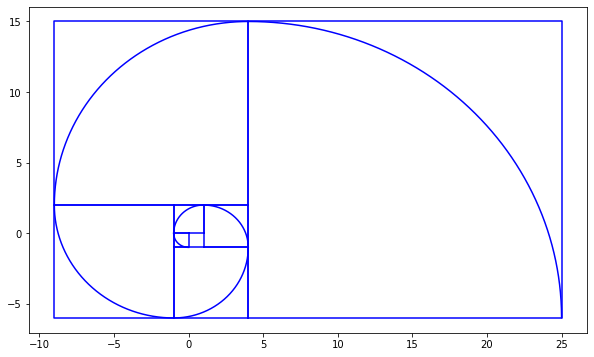

In [31]:
count = 7
f_list = fibo_seq(count)
x0_array, y0_array = find_o_xy(f_list)

f_list_r = fibo_seq(count+2)[2::] # O comprimento lateral correspondente de cada quadrado
square_list = np.zeros([1,2,5])
start_angle, end_angle = np.pi, 1.5 * np.pi

plt.figure(figsize=(10,6))
for n in np.arange(len(f_list_r)):
    # Coordenadas do centro do círculo
    x0 = x0_array[n]
    y0 = y0_array[n]
    
    # Obtenha coordenadas diagonais de vértice
    x2 = x0+f_list_r[n]*(-1)**((np.mod(n+1,2)+n+1)/2)
    if n == 0:
        y2 = -1 # Ponto de partida especial         
    else:
        y2 = y0+f_list_r[n]*(-1)**(1+(np.mod(n,2)+n)/2)

    # As duas coordenadas restantes
    x1, x3 = x0, x2
    y1, y3 = y2, y0
    
    # Integrar, desenhar um quadrado precisa-se voltar à origem, então 5 pontos
    pp = np.array([[[x0,x1,x2,x3,x0],[y0,y1,y2,y3,y0]]])
    
    # Desenhar o arco
    t = np.arange(start_angle,end_angle,0.001)
    circle_x = (f_list_r[n]) * (np.sin(t)) + x0_array[n]
    circle_y = (f_list_r[n]) * (np.cos(t)) + y0_array[n]
    start_angle += 0.5 * np.pi
    end_angle += 0.5 * np.pi
    
    plt.plot(pp[0][0][::], pp[0][1][::], color='b')
    plt.plot(circle_x, circle_y, color='b')